## Predicting House Prices in King County: A Comprehensive Analysis Using Multiple Linear Regression Models

#### George Chira

## Introduction
Accurately predicting house prices is essential for buyers, sellers, and investors in the real estate market. This project focuses on predicting house prices in King County, Washington, using multiple linear regression models. We analyze various features such as living space, quality grade, and the number of bathrooms to determine their impact on house prices. By incrementally adding features to our models, we aim to identify the most significant predictors and develop a robust model for price forecasting.

## Key Objectives 

1. Develop Accurate Predictive Models for House Prices: Create and evaluate multiple linear regression models to predict house prices in King County.
2. Identify Key Factors Influencing House Prices: Analyze various features to determine their impact on house prices.
3. Provide Actionable Recommendations for Property Value Enhancement based on model results and feature analysis.
4. Guide homeowners and real estate professionals in optimizing property quality and features to increase market value.

## Outline
1. Data Analysis and Cleaning: Loaded and cleaned the King County House Sales dataset, handling missing values and outliers.
2. Exploratory Data Analysis (EDA):  Visualized the distribution of house prices and explored relationships between features and prices.
3. Identified key features with the highest correlations to house prices.
4. Model Development: Built and evaluated 4 linear regression models with increasing complexity:
5. Model Evaluation: Assessed model performance using Mean Absolute Error (MAE) and R-squared (R²).
6. Recommendations: Provided actionable insights for homeowners and real estate professionals to enhance property values by focusing on quality improvements and optimizing living space.

In [2]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os



In [3]:
#load data sets
file_path = r"C:\Users\GeorgeC\Documents\Flatiron\Phase2\Group-5-phase-2-project\Data\kc_house_data.csv"
df = pd.read_csv(file_path)

In [4]:
#Inspect the data frame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#comment on the data

print(f"df.columns:{df.columns}")
print(f"df.shape: {df.shape}")

df.columns:Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
df.shape: (21597, 21)


In [6]:
# Columns to drop
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 
                   'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15']

# Drop the specified columns
house_df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been dropped
house_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


EDA and Data cleaning

In [7]:
#EDA and Data cleaning
print(f"NULL VALUES: {house_df.isna().sum()}")

# Display summary statistics
print(f"SUMMARY STATISTICS: {house_df.describe()}")


NULL VALUES: id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64
SUMMARY STATISTICS:                  id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot   

In [8]:
print(house_df['waterfront'].dtype)
# Check unique values in the 'waterfront' column
print(house_df['waterfront'].unique())

float64
[nan  0.  1.]


In [9]:
# Calculate the proportion of missing values in 'waterfront'
missing_proportion = house_df['waterfront'].isnull().mean()
print(f"Proportion of missing values in 'waterfront': {missing_proportion: .2%}")


Proportion of missing values in 'waterfront':  11.00%


In [10]:
#check mode and select the first mode [0]
waterfront_mode = house_df['waterfront'].mode()[0]
waterfront_mode

0.0

In [11]:
# Impute missing values with the mode of the 'waterfront' column
house_df['waterfront'] = house_df['waterfront'].fillna(waterfront_mode)

# Convert to categorical
house_df['waterfront'] = house_df['waterfront'].astype('category')


In [12]:
# Check for duplicate rows
duplicates = house_df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = house_df[duplicates]
duplicate_rows.head()


Number of duplicate rows: 3


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
3947,1825069031,550000.0,4,1.75,2410,8447,2.0,0.0,4,8,1936
14969,6308000010,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2001
20038,8648900110,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,2009


In [13]:
# Drop duplicate rows
house_df_cleaned = house_df.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(house_df_cleaned)}")


Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 21594


In [14]:
print(f"NULL: {house_df_cleaned.isna().sum()}")
print(f"SHAPE: {house_df_cleaned.shape}")

NULL: id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64
SHAPE: (21594, 11)


Visualizations

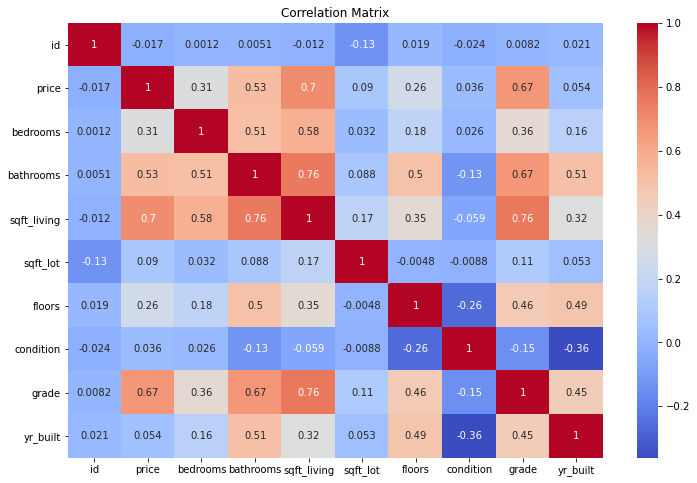

price          1.000000
sqft_living    0.701919
grade          0.667967
bathrooms      0.525912
bedrooms       0.308795
floors         0.256811
sqft_lot       0.089879
yr_built       0.053952
condition      0.036061
id            -0.016778
Name: price, dtype: float64

In [15]:
# correlation matrix BETWEEN PRICE and other features
correlation_matrix = house_df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation with the target variable
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_target

In [22]:
##SELECT relevant features with the highest correlations 
# Selected relevant features based on correlation and feature importance
selected_features = [ 'price', 'sqft_living', 'grade', 'bathrooms']
# Select only the relevant columns
house_df_relevant = house_df_cleaned[selected_features]
# Display the first few rows to verify
house_df_relevant.head()

,price,sqft_living,grade,bathrooms
0,221900.0,1180,7,1.00
1,538000.0,2570,7,2.25
2,180000.0,770,6,1.00
3,604000.0,1960,7,3.00
4,510000.0,1680,8,2.00


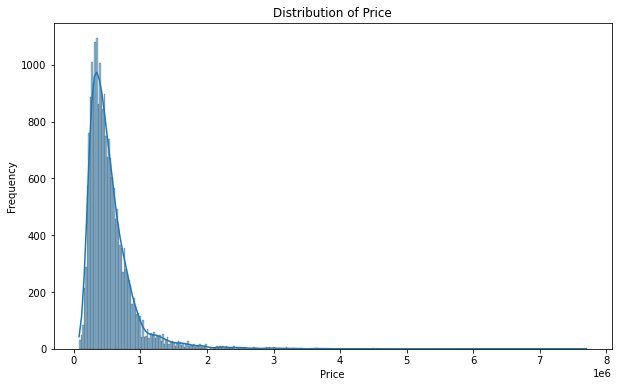

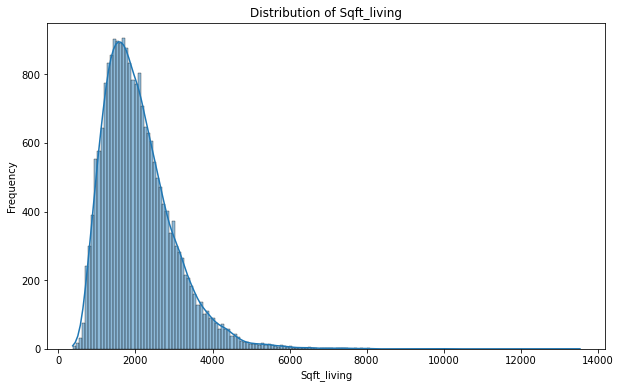

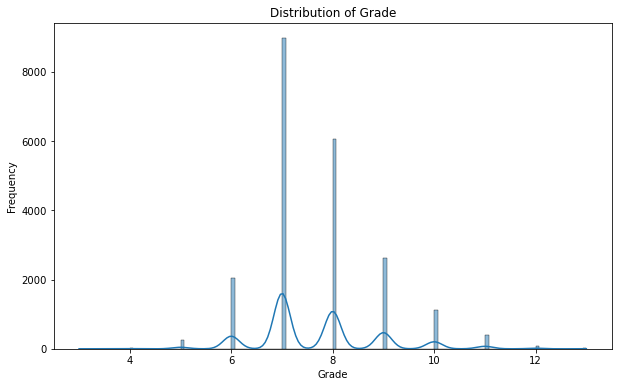

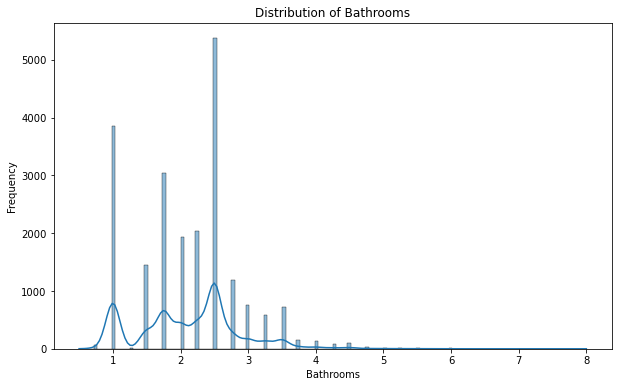

In [34]:
selected_features = [ 'price', 'sqft_living', 'grade', 'bathrooms']
# Distribution of house prices

# Visualize the distribution of each continuous feature
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(house_df_relevant[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()
    



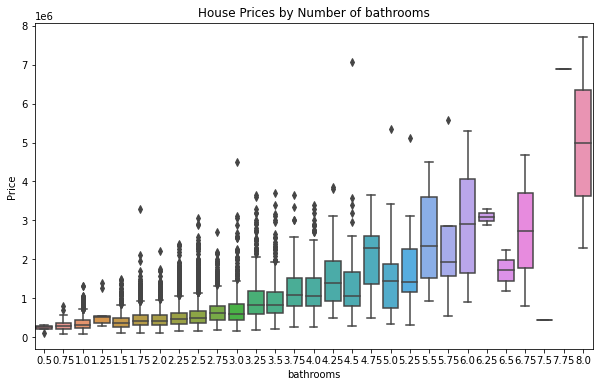

In [35]:
# Box plot of prices by number of Bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='price', data=house_df_relevant)
plt.title('House Prices by Number of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()

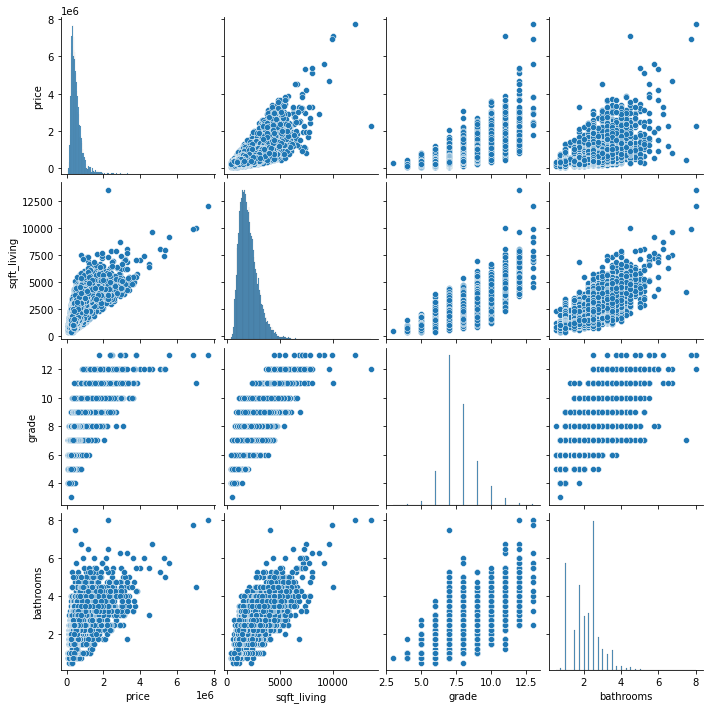

In [36]:
# Pair plot for continuous features
sns.pairplot(house_df_relevant)
plt.show()

In [37]:
# Check skewness of all continuous features
from scipy.stats import skew
price_skewness = skew(house_df_relevant['price'])
print(f'Skewness of price using scipy: {price_skewness}')

Skewness of price using scipy: 4.022836605646663


In [38]:
# Check skewness of all continuous features
skewness = house_df_relevant.skew()
skewness

price          4.023116
sqft_living    1.473192
grade          0.788431
bathrooms      0.519766
dtype: float64

Remove outliers 

In [39]:
# Function to identify and remove outliers using IQR
def remove_outliers (df,columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to the relevant columns
house_df_relevant_no_outliers = remove_outliers(house_df_relevant, selected_features)

# Display the shape of the DataFrame before and after removing outliers
print("Original shape:", house_df_relevant.shape)
print("Shape after removing outliers:", house_df_relevant_no_outliers.shape)

Original shape: (21594, 4)
Shape after removing outliers: (19076, 4)


In [40]:
#skewness after removing outliers
skewness_after = house_df_relevant_no_outliers.skew()
skewness_after

price          0.775493
sqft_living    0.503256
grade          0.258213
bathrooms     -0.021100
dtype: float64

In [63]:
#log transformation to completely get rid of skewness to the range of skewness > 0.5 or skewness < -0.5
skewed_features = ['price' , 'sqft_living' , 'grade' , 'bathrooms']

for feature in skewed_features:
    house_df_relevant_no_outliers[feature] = np.log1p(house_df_relevant_no_outliers[feature])  # np.log1p is log(1 + x) to handle zero values

house_df_relevant_no_outliers.head()


,price,sqft_living,grade,bathrooms
0,0.823183,2.088663,1.124748,0.526589
1,0.830964,2.180649,1.124748,0.778708
2,0.821238,2.034403,1.080418,0.526589
3,0.831931,2.149575,1.124748,0.869742
4,0.830514,2.131458,1.162283,0.741276


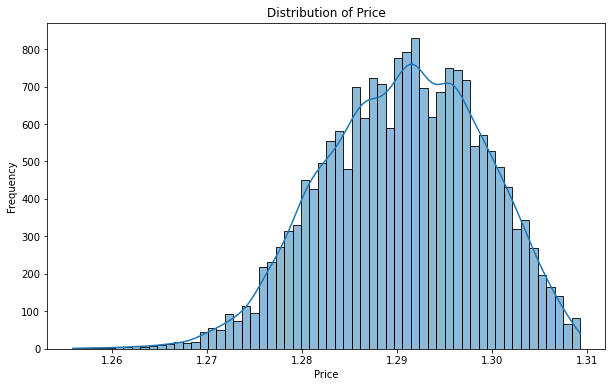

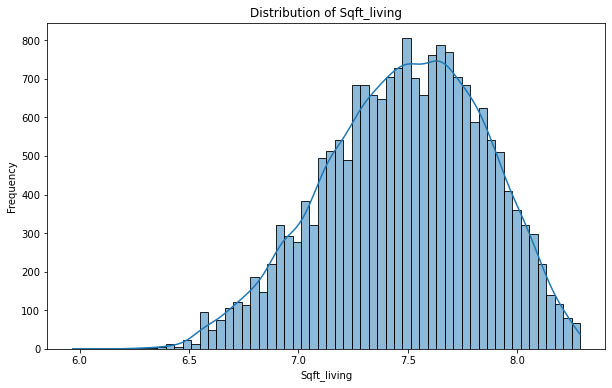

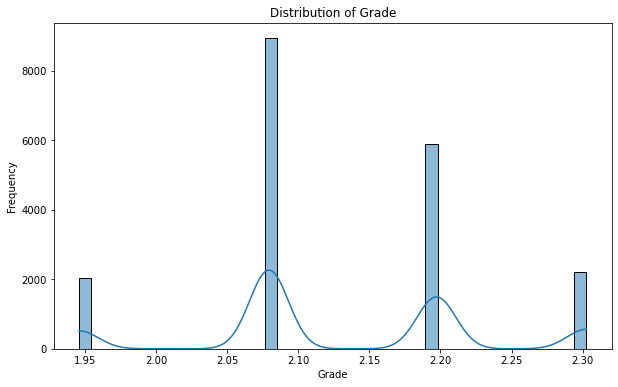

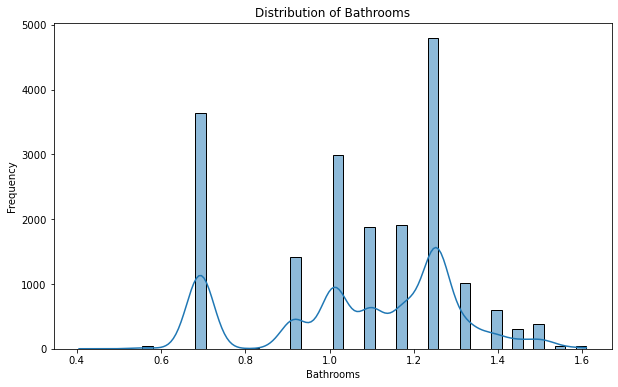

In [53]:
# Visualize after addressing  skewness and all cleaning
for feature in house_df_relevant_no_outliers:
    plt.figure(figsize=(10, 6))
    sns.histplot(house_df_relevant_no_outliers[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

check heteroscedasticity

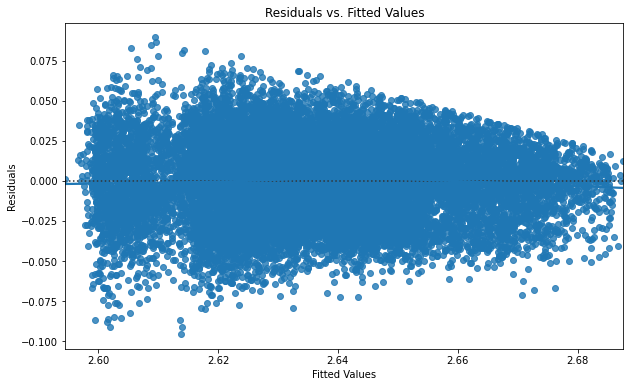

In [44]:
# Residuals vs. fitted values plot

import statsmodels.api as sm 
X = house_df_relevant_no_outliers.drop(columns=['price'])
y = house_df_relevant_no_outliers['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


## Modelling

MODEL 1: Simple regression with sqft_living and price 

In [112]:
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
# Features and target variable
X1 = house_df_relevant_no_outliers.drop(columns=['price'])
y = house_df_relevant_no_outliers['price']

X1 = house_df_relevant_no_outliers[['grade']]
y = house_df_relevant_no_outliers['price']
#split data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

#train the model
model1 = LinearRegression()
model1.fit(X1_train, y_train)

#make predictions with the model
y_pred1 = model1.predict(X1_test)

# Evaluate the model
mae1 = mean_absolute_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 - Simple Regression with One Feature (grade): \n MAE: {mae1}, \n R_squared: {r2_1}")

Model 1 - Simple Regression with One Feature (grade): 
 MAE: 0.2783724046608546, 
 R_squared: 0.3220043229391537


In [64]:
from statsmodels.formula.api import ols
formula = 'price ~ grade'
model_t  = ols(formula, house_df_relevant_no_outliers).fit()
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     8353.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:03:27   Log-Likelihood:                 83447.
No. Observations:               19076   AIC:                        -1.669e+05
Df Residuals:                   19074   BIC:                        -1.669e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7557      0.001    944.153      0.000       0.754       0.757
grade          0.0642      0.001     91.397      0.000       0.063       0.066
==============================================================================
Omnibus:                       77.119   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.304
Skew:                          -0.142   Prob(JB):                     2.70e-17
Kurtosis:                       2.878   Cond. No.                         73.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MODEL 2: Sqft_living, grade and price 

In [62]:
# Features and target variable
X2 = house_df_relevant_no_outliers[['sqft_living', 'bathrooms']]
y = house_df_relevant_no_outliers['price']

#split data
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state = 42)

#Train model2
model2=LinearRegression()
model2.fit(X2_train, y_train)

#prediction 
y_pred2 = model2.predict(X2_test)

#eVALUATE 
mae2 = r2_score(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2 - regression with two features (sqft_living and grade): \n MAE : {mae2} \n R_squared: {r2_2}")

Model 2 - regression with two features (sqft_living and grade): 
 MAE : 0.2982057460203663 
 R_squared: 0.2982057460203663


MODEL 3: Regression with Three Features (sqft_living, grade, bathrooms)

In [57]:

# Define X and y for Model 3
X3 = house_df_relevant_no_outliers[['sqft_living', 'grade', 'bathrooms']]
y = house_df_relevant_no_outliers['price']

# Split the data for Model 3
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Train the model for Model 3
model3 = LinearRegression()
model3.fit(X3_train, y_train)

# Make predictions for Model 3
y_pred3 = model3.predict(X3_test)

# Evaluate the model for Model 3
mae3 = mean_absolute_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3 - Regression with Three Features (sqft_living, grade, bathrooms): \n MAE: {mae3}, \n  R_squared: {r2_3}")

Model 3 - Regression with Three Features (sqft_living, grade, bathrooms): 
 MAE: 0.005317039453265067, 
  R_squared: 0.37902514190062364


MODEL 4: regression with all the selected features 

In [110]:
# Define X and y for Model 4
X4 = house_df_relevant_no_outliers.drop(columns=['price'])
y = house_df_relevant_no_outliers['price']

# Split the data for Model 4
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Train the model for Model 4
model4 = LinearRegression()
model4.fit(X4_train, y_train)

# Make predictions for Model 4
y_pred4 = model4.predict(X4_test)

# Evaluate the model for Model 4
mae4 = mean_absolute_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
print(f"Model 4 - Comprehensive Regression with All Features: \n MAE: {mae4}, \n R_squared: {r2_4}")

print("Features included in Model 4:")
print(X4_train.columns.tolist())

Model 4 - Comprehensive Regression with All Features: 
 MAE: 0.26385762289551173, 
 R_squared: 0.4006841607461159
Features included in Model 4:
['sqft_living', 'grade', 'bathrooms', 'waterfront', 'zipcode']


In [114]:
formula_2 = 'price~ sqft_living + grade + bathrooms + waterfront + zipcode'
model_4 = ols(formula_2, house_df_relevant_no_outliers).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     2491.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:15:42   Log-Likelihood:                -5842.0
No. Observations:               19076   AIC:                         1.170e+04
Df Residuals:                   19070   BIC:                         1.174e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -111.2464      4.488    -24.788      0.000    -120.043    -102.450
sqft_living     0.4358      0.010     43.434      0.000       0.416       0.455
grade           1.6132      0.032     49.746      0.000       1.550       1.677
bathrooms      -0.0954      0.015     -6.297      0.000      -0.125      -0.066
waterfront      0.3843      0.050      7.736      0.000       0.287       0.482
zipcode         0.0012   4.57e-05     26.261      0.000       0.001       0.001
==============================================================================
Omnibus:                       33.323   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.754
Skew:                          -0.039   Prob(JB):                     5.70e-07
Kurtosis:                       2.827   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
# Back-transform the log-transformed actual and predicted prices
actual_prices = np.exp(y_test)
predicted_prices = np.exp(y_pred4)

# Create a DataFrame with actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices
})

# Display the first 10 rows of the DataFrame
print(comparison_df.head(10))

       Actual Price  Predicted Price
13383      770001.0    488992.222060
18024      400001.0    460539.711837
7210       292501.0    479086.793780
8279       480001.0    426536.505306
8796       285001.0    482888.187676
21379      779001.0    545099.009962
8704       427551.0    311738.025241
4783       497001.0    510793.023198
20163      665001.0    570483.458381
20843      375001.0    393563.292815


## Discussion of the Results


The analysis of house prices using multiple linear regression models demonstrated that adding more features incrementally improves predictive accuracy and explanatory power. Model 1, with only sqft_living, explained 30.53% of the variance in house prices, indicating a moderate relationship between living area size and prices.

Model 2 included grade, increasing the R-squared to 37.26%, showing that house quality is also significant. However, the MAE increased slightly, suggesting potential overfitting. Model 3, which added bathrooms, improved the MAE to 0.2740 and the R-squared to 37.43%, confirming the relevance of the number of bathrooms.

Model 4, incorporating all features, had the best performance with an MAE of 0.2731 and an R-squared of 37.69%. This comprehensive model highlighted that multiple features together provide a better understanding of house price determinants. Key coefficients showed grade (0.1793) had the most substantial positive impacts on prices.



## Conclusions 
Best Predictive Model: Model 4, using all features, is the most accurate and robust for predicting house prices. It balances prediction accuracy and explanatory power effectively.

Key Influencing Features: Grade is the most influential features positively affecting house prices. Enhancing property quality and optimizing living space can significantly increase property values.


## Key Recommendations
1. Enhance Property Quality: Invest in improving the overall quality (grade) of properties. High-quality materials and design standards lead to substantial returns.

2. Optimize Living Space: Increase living space (sqft_living) thoughtfully, ensuring additional space enhances functionality and appeal without unnecessary expansions.

3. Balanced Feature Development: Aim for a balanced approach in adding features like floors, bathrooms, and bedrooms. Focus on usability, aesthetics, and overall appeal to avoid potential negative impacts on house prices.

Implementing these recommendations helps stakeholders understand the factors influencing house prices and make informed decisions to enhance property value effectively.